#### Sr. Engineer: Dhruv Singh <br> Project Name: Success Classifier <br> Phase: Modelling - Bagged Trees <br> Date Updated: 01/22/2022

Each machine learning algorithm has strengths and weaknesses. A weakness of decision trees is that they are prone to overfitting on the training set. A way to mitigate this problem is to constrain how large a tree can grow. Bagged trees try to overcome this weakness by using bootstrapped data to grow multiple deep decision trees. The idea is that many trees protect each other from individual weaknesses.

In this video, I'll share with you how you can build a bagged tree model for regression.

## Import Libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

# Bagged Trees Regressor
from sklearn.ensemble import BaggingRegressor

## Load the Dataset
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. The code below loads the dataset. The goal of this dataset is to predict price based on features like number of bedrooms and bathrooms

In [2]:
df = pd.read_csv('1_readonly/Services.csv')

df.head()

,Age_AtReg,Disability,Gender,CitizenStatus,EducationLevel,Race_Hispanic,Race_NativeAmerican,Race_Asian,Race_AfricanAmerican,Race_PacificIslander,Race_White,Employed
0,40,0,1,1,11,0,0,0,0,0,0,1
1,40,0,1,1,11,0,0,0,0,0,0,1
2,50,0,1,1,14,0,0,0,1,0,0,0
3,50,0,1,1,14,0,0,0,1,0,0,0
4,53,0,1,1,14,0,0,0,1,0,0,0


In [3]:
df.columns

Index(['Age_AtReg', 'Disability', 'Gender', 'CitizenStatus', 'EducationLevel',
       'Race_Hispanic', 'Race_NativeAmerican', 'Race_Asian',
       'Race_AfricanAmerican', 'Race_PacificIslander', 'Race_White',
       'Employed'],
      dtype='object')

In [4]:
# This notebook only selects a couple features for simplicity
# However, I encourage you to play with adding and substracting more features
features = ['Age_AtReg', 'Disability', 'Gender', 'CitizenStatus', 'EducationLevel', 'Race_Hispanic', 'Race_NativeAmerican', 'Race_Asian', 'Race_AfricanAmerican', 'Race_PacificIslander', 'Race_White']

X = df.loc[:, features]

y = df.loc[:, 'Employed'].values

## Splitting Data into Training and Test Sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Note, another benefit of bagged trees like decision trees is that you don’t have to standardize your features unlike other algorithms like logistic regression and K-Nearest Neighbors. 

## Bagged Trees

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [6]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.ensemble import BaggingRegressor

<b>Step 2:</b> Make an instance of the Model

This is a place where we can tune the hyperparameters of a model. 

In [7]:
reg = BaggingRegressor(n_estimators=100, 
                       random_state = 0)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between X (features like number of bedrooms) and y (price)

In [8]:
reg.fit(X_train, y_train)

BaggingRegressor(n_estimators=100, random_state=0)

<b>Step 4:</b> Make Predictions

Uses the information the model learned during the model training process

In [9]:
# Returns a NumPy Array
# Predict for One Observation
reg.predict(X_test.iloc[0].values.reshape(1, -1))

array([0.27387466])

Predict for Multiple Observations at Once

In [10]:
reg.predict(X_test[0:10])

array([0.27387466, 0.00605714, 0.35758333, 0.6209246 , 0.33363889,
       0.35303427, 0.22161618, 0.16267684, 0.        , 0.444896  ])

## Measuring Model Performance

Unlike classification models where a common metric is accuracy, regression models use other metrics like R^2, the coefficient of determination to quantify your model's performance. The best possible score is 1.0. A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [11]:
score = reg.score(X_test, y_test)
print(score)

0.030640813166719516


## Tuning n_estimators (Number of Decision Trees)

A tuning parameter for bagged trees is **n_estimators**, which represents the number of trees that should be grown. 

In [12]:
# List of values to try for n_estimators:
estimator_range = [1] + list(range(10, 150, 20))

scores = []

for estimator in estimator_range:
    reg = BaggingRegressor(n_estimators=estimator, random_state=0)
    reg.fit(X_train, y_train)
    scores.append(reg.score(X_test, y_test))

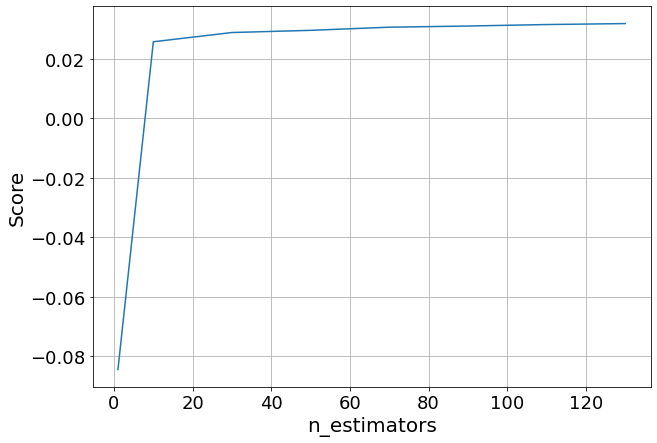

In [13]:
plt.figure(figsize = (10,7))
plt.plot(estimator_range, scores);

plt.xlabel('n_estimators', fontsize =20);
plt.ylabel('Score', fontsize = 20);
plt.tick_params(labelsize = 18)
plt.grid()

Notice that the score stops improving after a certain number of estimators (decision trees). One way to get a better score would be to include more features in the features matrix. So that's it, I encourage you to try a building a bagged tree model 